In [2]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 41.6 MB/s eta 0:00:00


In [3]:
import torch
from torch.nn.utils.rnn import pad_sequence
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import konlpy

print(torch.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(konlpy.__version__)

2.8.0+cu126
2.0.2
3.10.0
0.6.0


In [4]:
import pandas as pd

In [5]:
pd.read_csv('/content/ratings_train.txt', sep='\t')

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [6]:
pd.read_csv('/content/ratings_test.txt', sep='\t')

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [8]:
train_df = pd.read_csv('/content/ratings_train.txt', sep='\t')
test_df = pd.read_csv('/content/ratings_test.txt', sep='\t')

print("훈련 데이터 결측치:")
print(train_df.isnull().sum())

print("\n테스트 데이터 결측치:")
print(test_df.isnull().sum())

훈련 데이터 결측치:
id          0
document    5
label       0
dtype: int64

테스트 데이터 결측치:
id          0
document    3
label       0
dtype: int64


In [9]:
train_df = train_df.dropna(how='any')
test_df = test_df.dropna(how='any')

print("결측치 제거 후 훈련 데이터 결측치:")
print(train_df.isnull().sum())

print("\n결측치 제거 후 테스트 데이터 결측치:")
print(test_df.isnull().sum())

결측치 제거 후 훈련 데이터 결측치:
id          0
document    0
label       0
dtype: int64

결측치 제거 후 테스트 데이터 결측치:
id          0
document    0
label       0
dtype: int64


In [10]:
print("훈련 데이터 중복 확인:")
print(train_df.duplicated().sum())

print("\n테스트 데이터 중복 확인:")
print(test_df.duplicated().sum())

훈련 데이터 중복 확인:
0

테스트 데이터 중복 확인:
0


In [11]:
print("훈련 데이터 레이블 분포:")
print(train_df['label'].value_counts())

print("\n테스트 데이터 레이블 분포:")
print(test_df['label'].value_counts())

훈련 데이터 레이블 분포:
label
0    75170
1    74825
Name: count, dtype: int64

테스트 데이터 레이블 분포:
label
1    25171
0    24826
Name: count, dtype: int64


In [12]:
train_df['document_length'] = train_df['document'].apply(len)

print("훈련 데이터 리뷰 길이 분포 요약:")
print(train_df['document_length'].describe())

훈련 데이터 리뷰 길이 분포 요약:
count    149995.000000
mean         35.204527
std          29.531890
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: document_length, dtype: float64


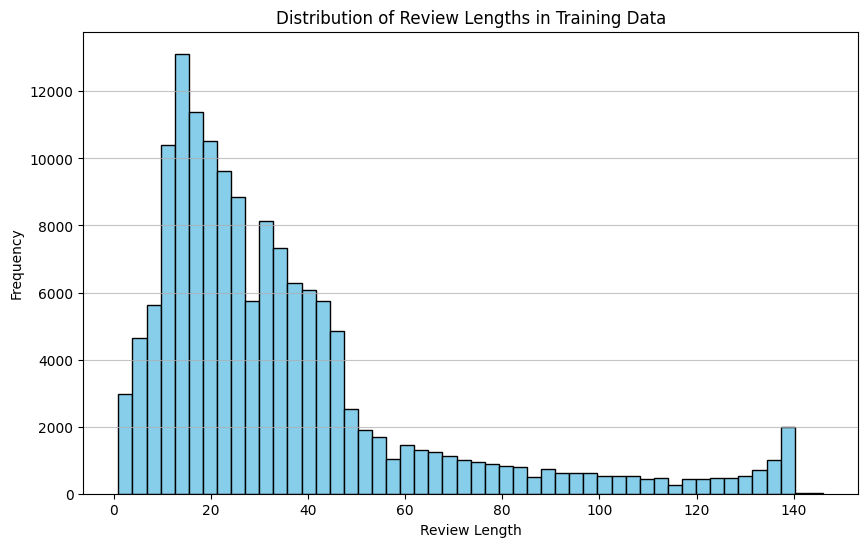

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['document_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths in Training Data')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [19]:
train_df = pd.read_csv('/content/ratings_train.txt', sep='\t')
test_df = pd.read_csv('/content/ratings_test.txt', sep='\t')

print("훈련 데이터 헤드:")
display(train_df.head())

print("\n테스트 데이터 헤드:")
display(test_df.head())

훈련 데이터 헤드:


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1



테스트 데이터 헤드:


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [29]:
import sentencepiece as spm
import os

corpus_file = '/content/ratings_train.txt'

spm.SentencePieceTrainer.train(
    input=corpus_file,
    model_prefix='naver_movie',
    vocab_size=8000,
    model_type='bpe'
)

In [30]:
import sentencepiece as spm

sp = spm.SentencePieceProcessor()
sp.load('naver_movie.model')

X_train_encoded = train_df['document'].apply(lambda x: sp.encode_as_ids(str(x)))

X_test_encoded = test_df['document'].apply(lambda x: sp.encode_as_ids(str(x)))

y_train = train_df['label']
y_test = test_df['label']

print("Encoded training data (first 5):")
print(X_train_encoded.head())

print("\nEncoded test data (first 5):")
print(X_test_encoded.head())

print("\nTraining labels (first 5):")
print(y_train.head())

print("\nTest labels (first 5):")
print(y_test.head())

Encoded training data (first 5):
0                    [10, 1240, 3, 80, 2952, 51, 2563]
1    [1861, 12, 5943, 228, 1488, 6, 6600, 41, 6457,...
2    [35, 6417, 7994, 163, 4703, 504, 1420, 2163, 360]
3    [717, 6394, 6484, 370, 6479, 6878, 495, 5215, ...
4    [3212, 7215, 6966, 6418, 6402, 3833, 6598, 227...
Name: document, dtype: object

Encoded test data (first 5):
0                                          [1347, 547]
1    [3025, 6934, 7230, 6857, 6567, 7231, 6854, 725...
2    [1685, 8, 112, 314, 41, 2346, 6436, 4021, 18, ...
3    [164, 6393, 261, 772, 6423, 278, 804, 6546, 12...
4    [28, 6934, 6403, 182, 6458, 806, 155, 5993, 12...
Name: document, dtype: object

Training labels (first 5):
0    0
1    1
2    0
3    0
4    1
Name: label, dtype: int64

Test labels (first 5):
0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [23]:
from torch.utils.data import TensorDataset, DataLoader

encoded_lengths = X_train_encoded.apply(len)

#최대 문장길이 95%
max_sequence_length = int(encoded_lengths.quantile(0.95))
print(f"Determined maximum sequence length: {max_sequence_length}")

def pad_and_truncate(sequence, max_length, padding_value=0):
    if len(sequence) > max_length:
        return sequence[:max_length]
    elif len(sequence) < max_length:
        return sequence + [padding_value] * (max_length - len(sequence))
    else:
        return sequence

X_train_padded = X_train_encoded.apply(lambda x: pad_and_truncate(x, max_sequence_length))
X_test_padded = X_test_encoded.apply(lambda x: pad_and_truncate(x, max_sequence_length))

X_train_tensor = torch.tensor(X_train_padded.tolist(), dtype=torch.long)
y_train_tensor = torch.tensor(y_train.tolist(), dtype=torch.long)
X_test_tensor = torch.tensor(X_test_padded.tolist(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.tolist(), dtype=torch.long)

print("\nPadded training tensor shape:", X_train_tensor.shape)
print("Training labels tensor shape:", y_train_tensor.shape)
print("Padded test tensor shape:", X_test_tensor.shape)
print("Test labels tensor shape:", y_test_tensor.shape)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nTrain DataLoader created with batch size {batch_size}")
print(f"Test DataLoader created with batch size {batch_size}")

Determined maximum sequence length: 50

Padded training tensor shape: torch.Size([150000, 50])
Training labels tensor shape: torch.Size([150000])
Padded test tensor shape: torch.Size([50000, 50])
Test labels tensor shape: torch.Size([50000])

Train DataLoader created with batch size 64
Test DataLoader created with batch size 64


In [25]:
import torch.nn as nn

class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)


        hidden = hidden.squeeze(0)
        output = self.fc(hidden)
        return torch.sigmoid(output)

vocab_size = sp.get_piece_size()
embedding_dim = 100
hidden_dim = 128

model = SentimentClassifier(vocab_size, embedding_dim, hidden_dim)

print(model)

SentimentClassifier(
  (embedding): Embedding(8000, 100)
  (rnn): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


In [26]:
import torch.optim as optim

criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model.to(device)
print("Model moved to device.")

Using device: cuda
Model moved to device.


In [27]:
model.train()

num_epochs = 5

for epoch in range(num_epochs):
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device).float().unsqueeze(1)

        optimizer.zero_grad()

        outputs = model(batch_X)

        loss = criterion(outputs, batch_y)

        loss.backward()

        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/5], Loss: 0.4550
Epoch [2/5], Loss: 0.3175
Epoch [3/5], Loss: 0.2702
Epoch [4/5], Loss: 0.2233
Epoch [5/5], Loss: 0.1748


In [28]:
model.eval()

correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device).float().unsqueeze(1)

        outputs = model(batch_X)

        predicted_labels = (outputs >= 0.5).long()

        correct_predictions += (predicted_labels == batch_y.long()).sum().item()
        total_samples += batch_y.size(0)

accuracy = correct_predictions / total_samples

print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8477


In [31]:
import sentencepiece as spm

def sp_tokenize(text):
    """
    Tokenizes input text using the trained SentencePiece model.

    Args:
        text (str): The input text string.

    Returns:
        list: A list of token IDs.
    """
    if not isinstance(text, str):
        text = str(text)
    return sp.encode_as_ids(text)

# Example usage:
sample_text = "안녕하세요, SentencePiece 토큰화 테스트입니다."
token_ids = sp_tokenize(sample_text)
print(f"Original text: {sample_text}")
print(f"Token IDs: {token_ids}")


Original text: 안녕하세요, SentencePiece 토큰화 테스트입니다.
Token IDs: [52, 7324, 3058, 6425, 1467, 4996, 6695, 4996, 6840, 6682, 7231, 3920, 6840, 6682, 1044, 6936, 6390, 1542, 681, 247, 6374]
